In [30]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [24]:
#Import csv file for hospital charges
df = pd.read_csv("Inpatient_Prospective_Payment_System.csv")
data3 = pd.read_csv("ratingsAndOwnership.csv",encoding='mac_roman') #grabbing ratings and ownership type only
data3 = data3[['Provider ID', 'Hospital Type', 'Hospital Ownership',
       'Hospital overall rating']]
data3 = data3.rename(columns={'Provider ID': 'Provider Id'})
df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

In [25]:
df = pd.merge(df,data3, on = 'Provider Id', how = 'outer')
df= df.drop_duplicates()
df = df.dropna(how = "any") 
df = df[df['Hospital overall rating'] != "Not Available"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157403 entries, 0 to 163045
Data columns (total 15 columns):
DRG Definition                          157403 non-null object
Provider Id                             157403 non-null int64
Provider Name                           157403 non-null object
Provider Street Address                 157403 non-null object
Provider City                           157403 non-null object
Provider State                          157403 non-null object
Provider Zip Code                       157403 non-null float64
Hospital Referral Region Description    157403 non-null object
 Total Discharges                       157403 non-null float64
 Average Covered Charges                157403 non-null object
 Average Total Payments                 157403 non-null object
Average Medicare Payments               157403 non-null object
Hospital Type                           157403 non-null object
Hospital Ownership                      157403 non-null object
Hospit

In [26]:
#Convert strings to numeric in dataframe and export cleaned csv
df[' Average Covered Charges '] = df[' Average Covered Charges '].str.split('$').apply(lambda x: x[-1])
df[' Average Total Payments '] = df[' Average Total Payments '].str.split('$').apply(lambda x: x[-1])
df['Average Medicare Payments'] = df['Average Medicare Payments'].str.split('$').apply(lambda x: x[-1])
df[' Average Total Payments '] = pd.to_numeric(df[' Average Total Payments '])
df['Average Medicare Payments'] = pd.to_numeric(df['Average Medicare Payments'])
df[' Average Covered Charges '] = pd.to_numeric(df[' Average Covered Charges '])
#df.to_csv("hospital_charges_numeric.csv")
df.head(10)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Hospital Type,Hospital Ownership,Hospital overall rating
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,AL - Dothan,91.0,32963.07,5777.24,4763.73,Acute Care Hospitals,Government - Hospital District or Authority,3
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,AL - Dothan,38.0,20312.78,4894.76,3865.50,Acute Care Hospitals,Government - Hospital District or Authority,3
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,AL - Dothan,84.0,38820.39,10260.21,9167.08,Acute Care Hospitals,Government - Hospital District or Authority,3
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,AL - Dothan,169.0,27345.10,6542.08,5438.50,Acute Care Hospitals,Government - Hospital District or Authority,3
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,AL - Dothan,33.0,17605.51,4596.39,3618.93,Acute Care Hospitals,Government - Hospital District or Authority,3
5,069 - TRANSIENT ISCHEMIA,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,AL - Dothan,37.0,20688.83,4134.10,3103.40,Acute Care Hospitals,Government - Hospital District or Authority,3
6,074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,AL - Dothan,13.0,18489.15,4876.00,4097.23,Acute Care Hospitals,Government - Hospital District or Authority,3
7,101 - SEIZURES W/O MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,AL - Dothan,27.0,19619.70,4667.22,3249.66,Acute Care Hospitals,Government - Hospital District or Authority,3
8,176 - PULMONARY EMBOLISM W/O MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,AL - Dothan,33.0,23680.30,6020.27,5338.09,Acute Care Hospitals,Government - Hospital District or Authority,3
9,177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,AL - Dothan,21.0,48240.09,11634.52,10553.23,Acute Care Hospitals,Government - Hospital District or Authority,3


In [27]:
df["Hospital Ownership"] = df["Hospital Ownership"].replace({
    
    'Voluntary non-profit - Private':'Voluntary(non-profit)',
    'Voluntary non-profit - Church':'Voluntary(non-profit)',
    'Voluntary non-profit - Other':'Voluntary(non-profit)', 
    
    'Government - Hospital District or Authority': 'Government',
    'Government - State': 'Government',
    'Government - Local': 'Government',
    'Government - Federal': 'Government',
    
    'Proprietary': 'Individual Business',
     'Physician': 'Individual Business'})

In [28]:
df

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Hospital Type,Hospital Ownership,Hospital overall rating
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,AL - Dothan,91.0,32963.07,5777.24,4763.73,Acute Care Hospitals,Government,3
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,AL - Dothan,38.0,20312.78,4894.76,3865.50,Acute Care Hospitals,Government,3
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,AL - Dothan,84.0,38820.39,10260.21,9167.08,Acute Care Hospitals,Government,3
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,AL - Dothan,169.0,27345.10,6542.08,5438.50,Acute Care Hospitals,Government,3
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,AL - Dothan,33.0,17605.51,4596.39,3618.93,Acute Care Hospitals,Government,3
5,069 - TRANSIENT ISCHEMIA,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,AL - Dothan,37.0,20688.83,4134.10,3103.40,Acute Care Hospitals,Government,3
6,074 - CRANIAL & PERIPHERAL NERVE DISORDERS W/O...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,AL - Dothan,13.0,18489.15,4876.00,4097.23,Acute Care Hospitals,Government,3
7,101 - SEIZURES W/O MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,AL - Dothan,27.0,19619.70,4667.22,3249.66,Acute Care Hospitals,Government,3
8,176 - PULMONARY EMBOLISM W/O MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,AL - Dothan,33.0,23680.30,6020.27,5338.09,Acute Care Hospitals,Government,3
9,177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,AL - Dothan,21.0,48240.09,11634.52,10553.23,Acute Care Hospitals,Government,3


In [50]:
#Filter for top 5 services
top_5 = df.loc[(df['DRG Definition'] == "194 - SIMPLE PNEUMONIA & PLEURISY W CC") |
               (df['DRG Definition'] == "690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC") |
               (df['DRG Definition'] == "292 - HEART FAILURE & SHOCK W CC") |
               (df['DRG Definition'] == "392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC") |
               (df['DRG Definition'] == "641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC"), :]
# top_5.to_csv("top_5_services.csv")

top_5= top_5.drop_duplicates()
top_5 = top_5.dropna(how = "any") 
top_5.head(2)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Hospital Type,Hospital Ownership,Hospital overall rating
16,194 - SIMPLE PNEUMONIA & PLEURISY W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,AL - Dothan,107.0,21096.94,5832.73,4615.95,Acute Care Hospitals,Government,3
37,292 - HEART FAILURE & SHOCK W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,AL - Dothan,229.0,23352.07,6045.81,4916.71,Acute Care Hospitals,Government,3


In [51]:
owners = top_5['Hospital Ownership'].unique()
owners

array(['Government', 'Voluntary(non-profit)', 'Individual Business',
       'Tribal'], dtype=object)

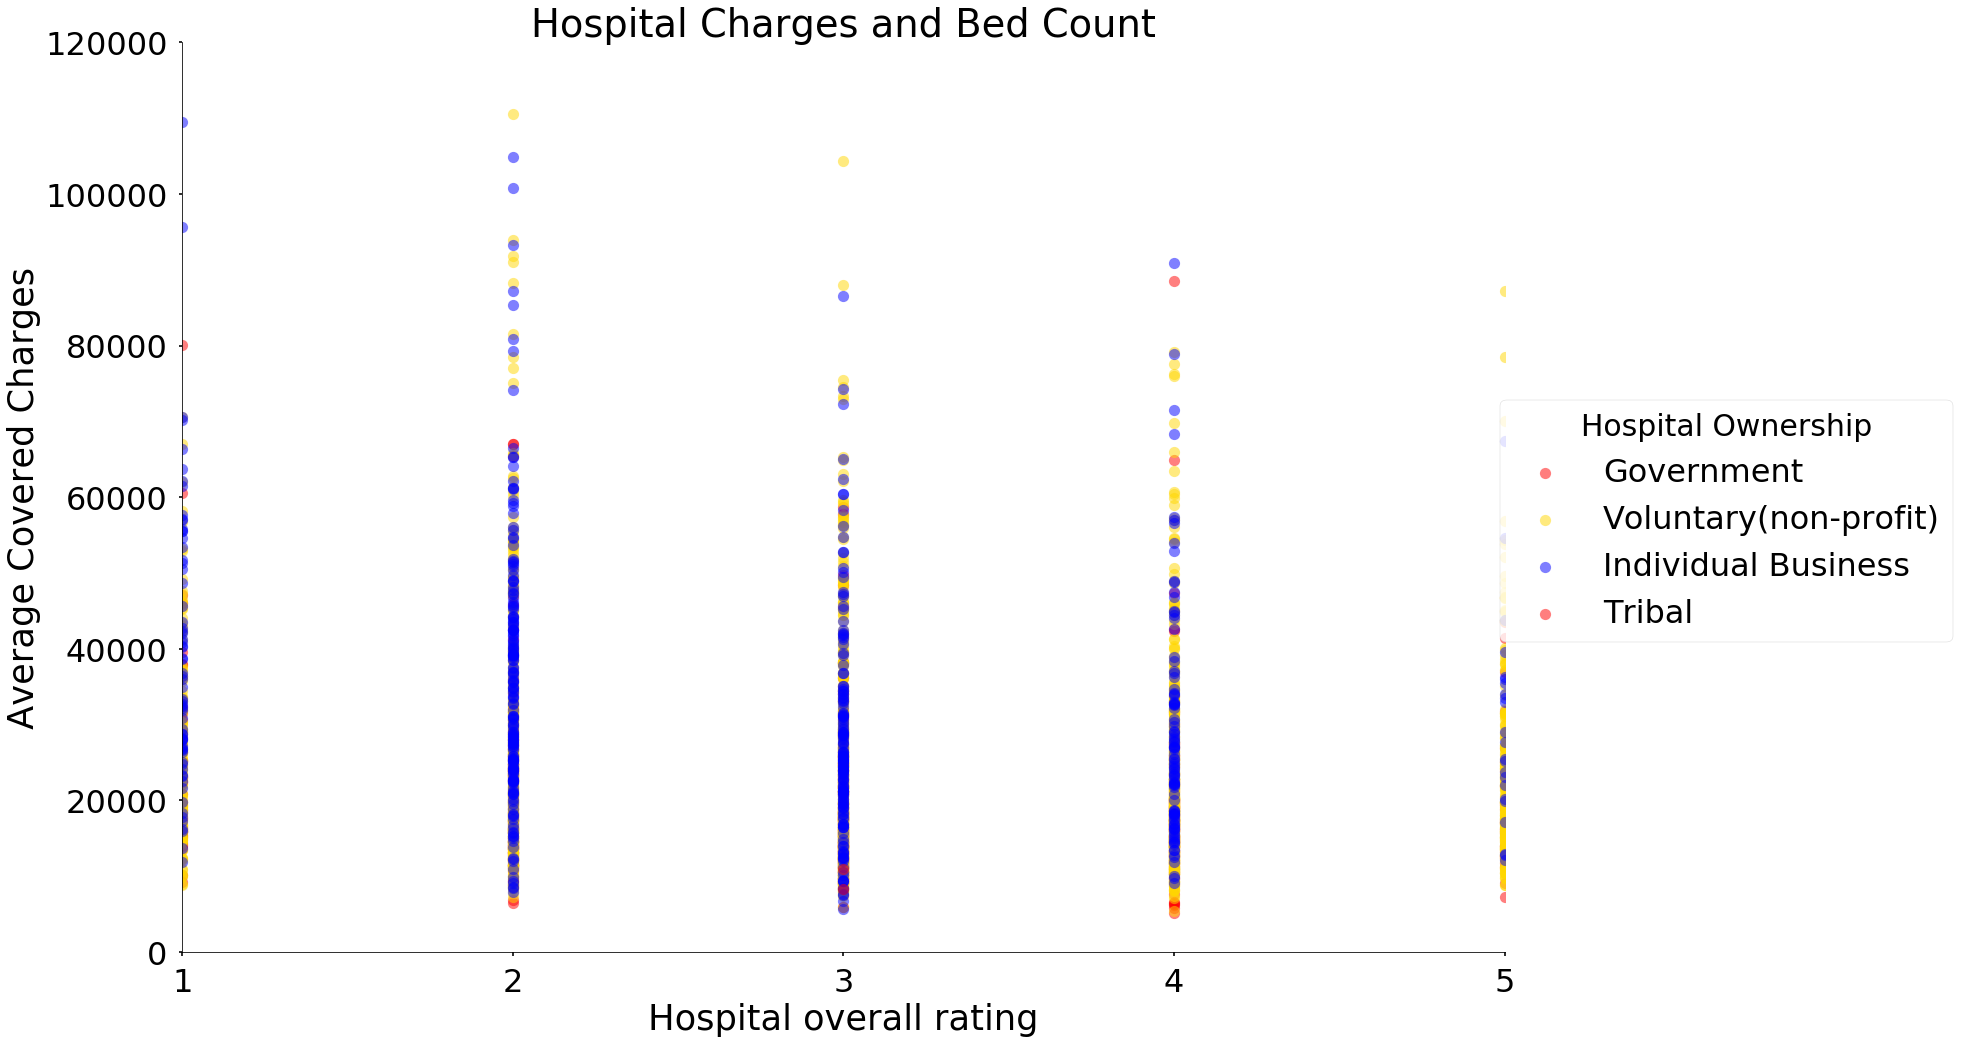

In [38]:
sns.set_context("poster", font_scale = 2)
fig = sns.lmplot(x='Hospital overall rating', y=' Average Covered Charges ', hue="Hospital Ownership", data=top_5, 
           fit_reg=False, scatter_kws={"alpha":0.5},size=15, aspect=1.5, palette=['red','gold','blue'])
plt.xlim(0, 5)
plt.ylim(0, 120000)
plt.title("Hospital Charges and Bed Count")
plt.figure
# plt.savefig("Scatter-Hospital Charges and Bed Count.png")
plt.show()

In [168]:
top_5_list = top_5['DRG Definition'].unique()
top_5_list

array(['194 - SIMPLE PNEUMONIA & PLEURISY W CC',
       '292 - HEART FAILURE & SHOCK W CC',
       '392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC',
       '641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC',
       '690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC'], dtype=object)

In [193]:
def make_histogram(service):
    service_df = df.loc[(df['DRG Definition'] == service)]
    plt.hist(service_df[' Average Covered Charges '], bins=bins, alpha = 0.4, label = f'{service}')

In [161]:
def make_histogram_owner(owner):
    eval_df = df.loc[(df['Hospital Ownership'] == owner)]
    plt.hist(eval_df[' Average Covered Charges '], bins=bins, alpha=0.4, label=f'Chargest by {owner}')

def make_histogram_owner_payment(owner):
    eval_df = df.loc[(df['Hospital Ownership'] == owner)]
    plt.hist(eval_df[' Average Covered Charges '] - eval_df['Average Medicare Payments'], bins=bins, alpha=0.4, label=f'Medicare costs by {owner}')
def adjusted(owner):
    eval_df = df.loc[(df['Hospital Ownership'] == owner)]
    plt.hist(eval_df[' Average Covered Charges '][0:round(len(eval_df)/int(5))] - eval_df['Average Medicare Payments'][0:round(len(eval_df)/int(5))], bins=bins, alpha=0.4, label=f'Medicare costs by {owner}')

In [156]:
print(len(df))
print(round(len(df['Average Medicare Payments'])/int(5)))

157403
31481


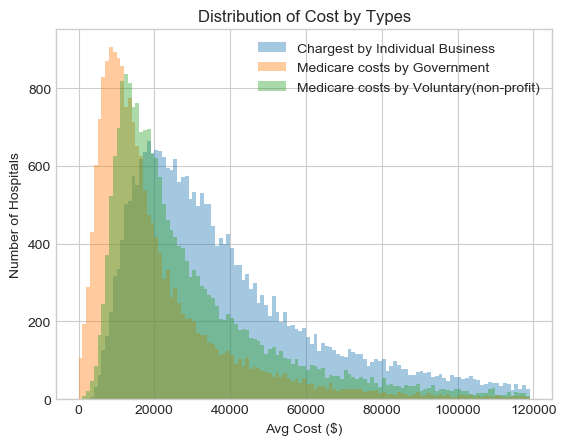

In [166]:
plt.rcParams.update(plt.rcParamsDefault)

bins = np.arange(0,120000, 1000)
sns.set_style('whitegrid')
# make_histogram_owner('Voluntary(non-profit)')
# make_histogram_owner('Individual Business')
# make_histogram_owner('Government')


make_histogram_owner('Individual Business')
make_histogram_owner_payment('Government')
adjusted('Voluntary(non-profit)')

plt.legend(loc='upper right')
plt.title('Distribution of Cost by Types')
plt.ylabel('Number of Hospitals')
plt.xlabel('Avg Cost ($)')
plt.show()

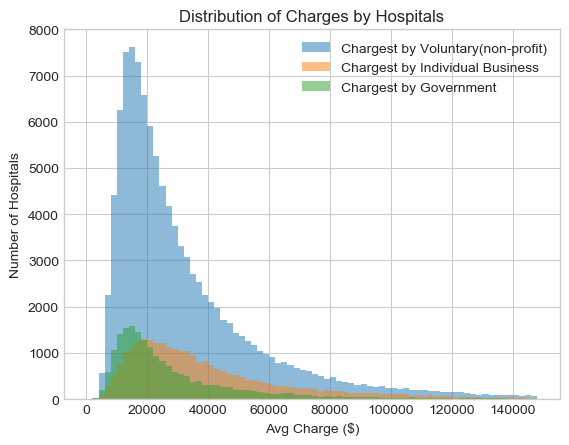

In [119]:
plt.rcParams.update(plt.rcParamsDefault)

bins = np.arange(0,150000, 2000)
sns.set_style('whitegrid')
# make_histogram_owner('Voluntary(non-profit)')
# make_histogram_owner('Individual Business')
# make_histogram_owner('Government')

make_histogram_owner_payment('Voluntary(non-profit)')
make_histogram_owner_payment('Government')
make_histogram_owner('Individual Business')

plt.legend(loc='upper right')
plt.title('Distribution of Charges by Hospitals')
plt.ylabel('Number of Hospitals')
plt.xlabel('Avg Charge ($)')
plt.show()

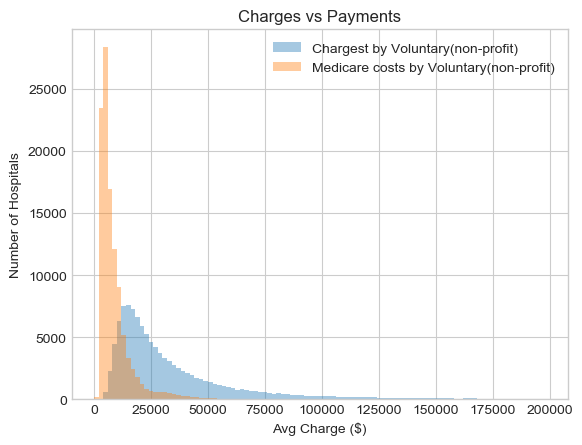

In [121]:
plt.rcParams.update(plt.rcParamsDefault)

bins = np.arange(0,200000, 2000)
sns.set_style('whitegrid')
make_histogram_owner('Voluntary(non-profit)')
# make_histogram_owner('Individual Business')
# make_histogram_owner('Government')


make_histogram_owner_payment('Voluntary(non-profit)')
# make_histogram_owner_payment('Government')
plt.legend(loc='upper right')
plt.title('Charges vs Payments')
plt.ylabel('Number of Hospitals')
plt.xlabel('Avg Charge ($)')
plt.show()

In [ ]:
def make_histogram_cost(service):
    service_df = df.loc[(df['DRG Definition'] == service)]
    maxs = service_df['Average Medicare Payments'].max()
    bins = np.arange(0,maxs, 2000)
    plt.figure(figsize=(20,10))
    print(plt.hist(service_df['Average Medicare Payments'], bins=bins))

In [ ]:
grouped2 = df.groupby('DRG Definition').mean()
grouped2_sort = grouped2.sort_values(' Average Covered Charges ', ascending = False)
grouped2_sort.head()

In [219]:
max(set(df[' Average Covered Charges '].tolist()), key=df[' Average Covered Charges '].tolist().count)

KeyboardInterrupt: 

In [216]:
def make_histogram(service):
    service_df = df.loc[(df['DRG Definition'] == service)]
    service_mode = max(set(service_df[' Average Covered Charges ']), key=service_df[' Average Covered Charges '].count)
    print(service_mode)
    plt.hist(service_df[' Average Covered Charges '], bins=bins, alpha = 0.6, label = f'{service}')


AttributeError: 'Int64Index' object has no attribute 'levels'

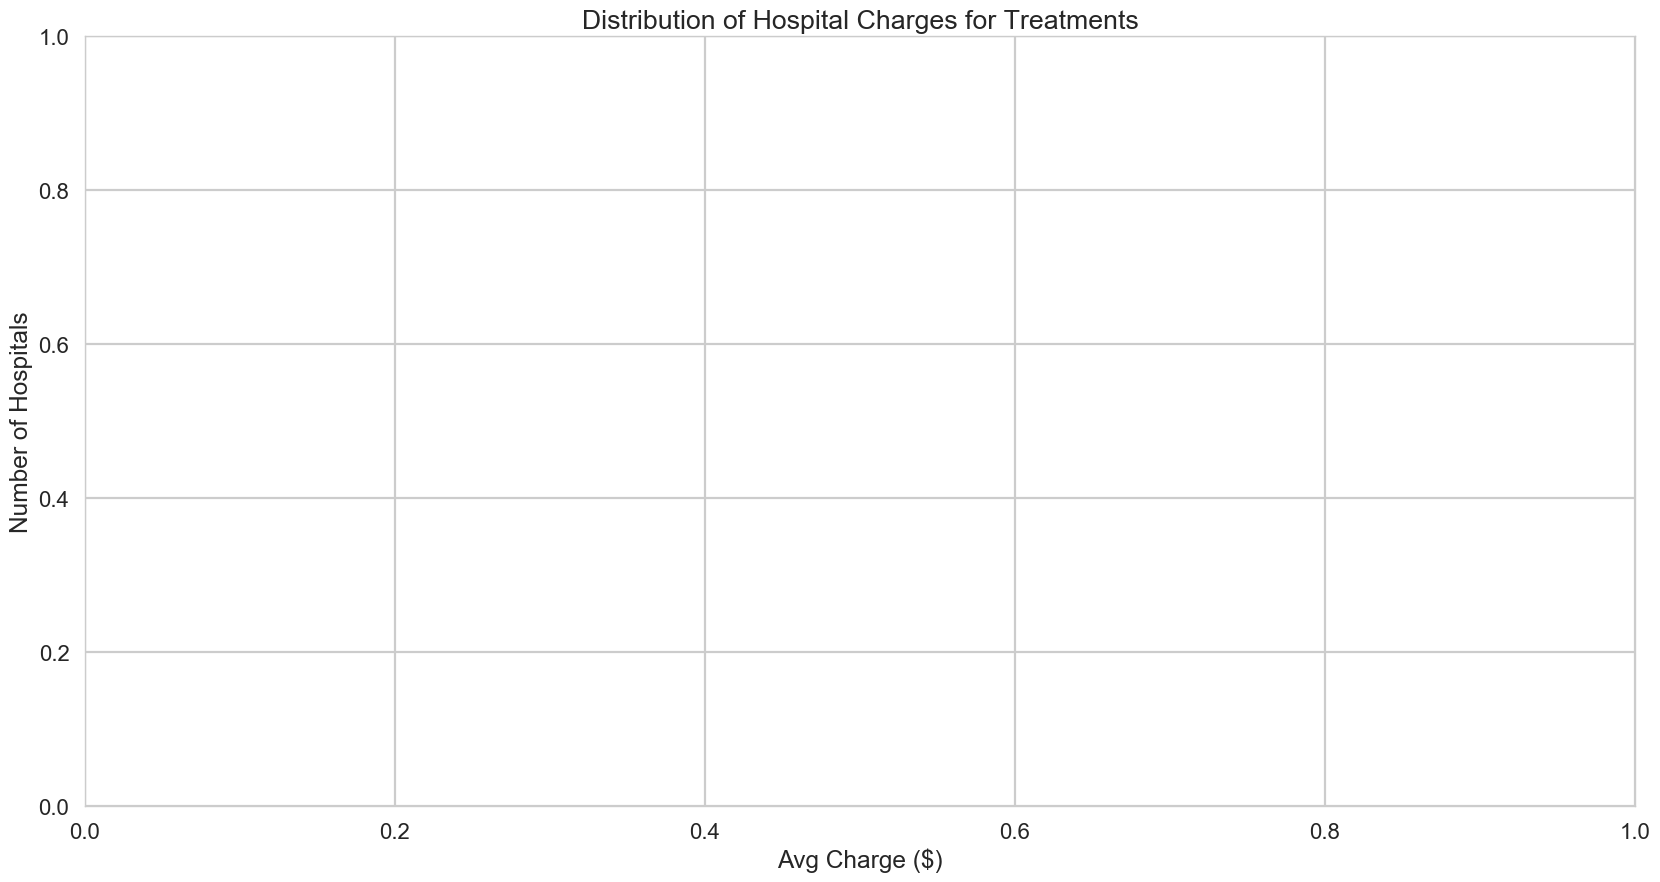

In [217]:
plt.rcParams.update(plt.rcParamsDefault)
sns.set_style('whitegrid')
sns.set_context('poster')
bins = np.arange(0,100000, 1000)
plt.figure(figsize=(20,10))

plt.title('Distribution of Hospital Charges for Treatments')
plt.ylabel('Number of Hospitals')
plt.xlabel('Avg Charge ($)')
for service in top_5_list[[4,0]]:
    make_histogram(service)
plt.legend(loc='best')
plt.axvline(x=service_mode, color='black', alpha = 0.4)


In [169]:
for service in top_5_list:
    make_histogram(service)

NameError: name 'make_histogram' is not defined

In [ ]:
make_histogram('870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS')

In [ ]:
grouped_5 = top_5.groupby("DRG Definition")
mean_5 = grouped_5.mean()
sem_5 = grouped_5.sem()
mean_5.head()

In [ ]:
sem_5.head()